# Model Comparison

In [1]:
import numpy as np
import pandas as pd
import json
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tabulate import tabulate
from PIL import Image
from Model_comparison_functions import *

Set path:


In [2]:
desktop_path = os.path.expanduser("~/Desktop")
#os.chdir(desktop_path+'\DTU MSc\MSc thesis\git\lightenup')
os.chdir(desktop_path+'\Thesis')
Add_on_path = "\\Results\\Base_case - GA\\"
Add_on_path = "\\Results\\Base_case - GA - Acceptance\\"
current_directory = os.getcwd()  # Jupyter file take the current directory as where the jupyter file is located. Different than a .py file...

In [14]:
forecast_idx = 1
SampleSize_idx = 5
ids = [f'f{forecast_idx}_d{SampleSize_idx}_upd{d}_t{d+1}' for d in range(0,88)]
acceptance_count = ["acceptance_FD2_down","acceptance_FD2_up","acceptance_FD1_down","acceptance_FD1_up"]
bid_quantities   = ["b_FD2_dn","b_FD2_up","b_DA_dn","b_DA_up","b_FD1_dn","b_FD1_up"]
models = ["Rule","Det","Sto","Feature","Oracle"]
Array_Acceptance = np.empty((len(acceptance_count),24, 88, 5))
Array_Bid = np.empty((len(bid_quantities),24, 88, 5))


# Load each id at a time
for d,id in enumerate(ids):
    results = import_test_case(current_directory, Add_on_path, id)
    print("Import ", id)


    # Gather all the information:
    for m,model in enumerate(models):
        # Acceptance
        for a,acc in enumerate(acceptance_count):
            #print(results[model]['RT'][acc])
            Array_Acceptance[a,:,d,m] = results[model]['RT'][acc]

        # Bid quantity
        for b,bid in enumerate(bid_quantities):
            #print(results[model]['Bid'][bid])
            Array_Bid[b,:,d,m] = results[model]['Bid'][bid]



Import  f1_d5_upd0_t1
Import  f1_d5_upd1_t2
Import  f1_d5_upd2_t3
Import  f1_d5_upd3_t4
Import  f1_d5_upd4_t5
Import  f1_d5_upd5_t6
Import  f1_d5_upd6_t7
Import  f1_d5_upd7_t8
Import  f1_d5_upd8_t9
Import  f1_d5_upd9_t10
Import  f1_d5_upd10_t11
Import  f1_d5_upd11_t12
Import  f1_d5_upd12_t13
Import  f1_d5_upd13_t14
Import  f1_d5_upd14_t15
Import  f1_d5_upd15_t16
Import  f1_d5_upd16_t17
Import  f1_d5_upd17_t18
Import  f1_d5_upd18_t19
Import  f1_d5_upd19_t20
Import  f1_d5_upd20_t21
Import  f1_d5_upd21_t22
Import  f1_d5_upd22_t23
Import  f1_d5_upd23_t24
Import  f1_d5_upd24_t25
Import  f1_d5_upd25_t26
Import  f1_d5_upd26_t27
Import  f1_d5_upd27_t28
Import  f1_d5_upd28_t29
Import  f1_d5_upd29_t30
Import  f1_d5_upd30_t31
Import  f1_d5_upd31_t32
Import  f1_d5_upd32_t33
Import  f1_d5_upd33_t34
Import  f1_d5_upd34_t35
Import  f1_d5_upd35_t36
Import  f1_d5_upd36_t37
Import  f1_d5_upd37_t38
Import  f1_d5_upd38_t39
Import  f1_d5_upd39_t40
Import  f1_d5_upd40_t41
Import  f1_d5_upd41_t42
Import  f1_

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]


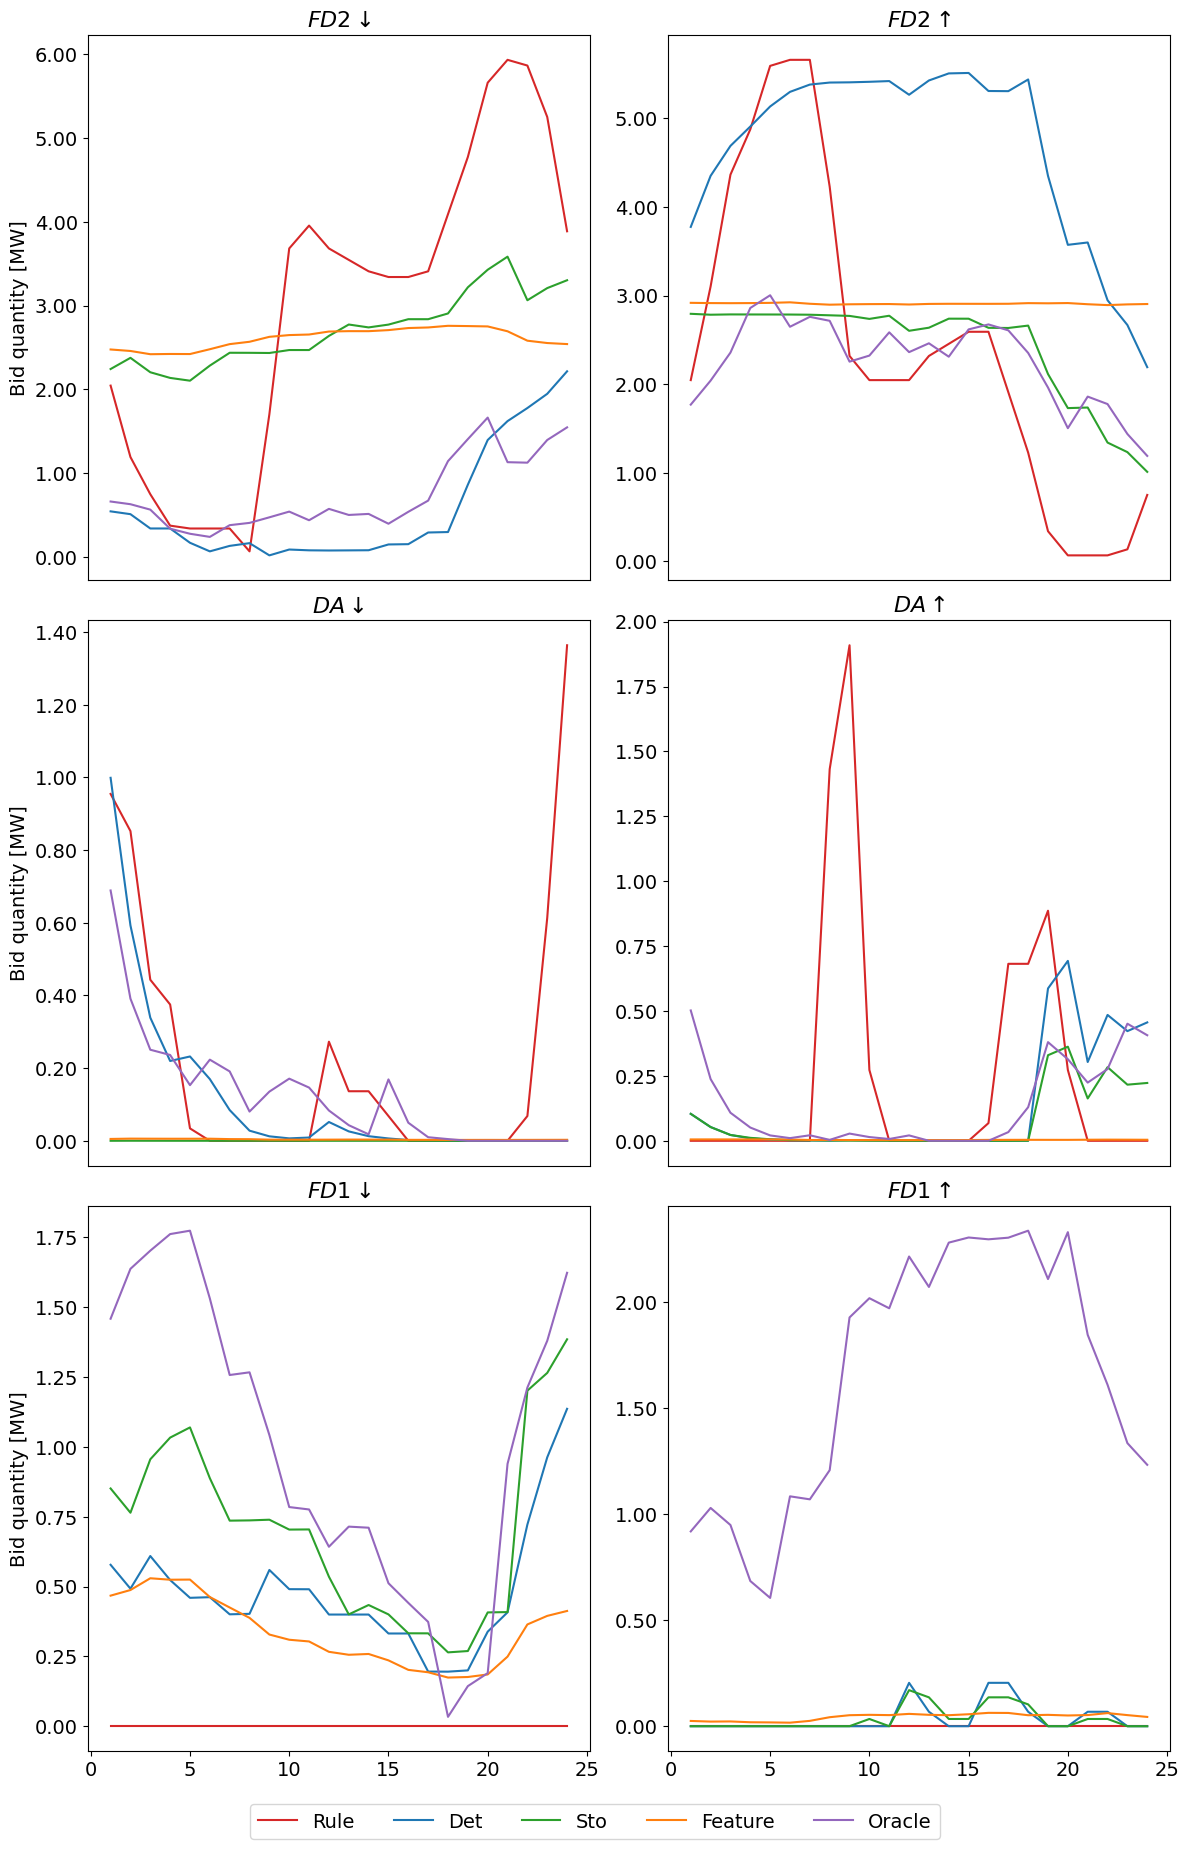

In [49]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import ScalarFormatter

Acceptance_mean = np.mean(Array_Acceptance, axis=2)
Acceptance_std = np.std(Array_Acceptance, axis=2)
Bid_mean = np.mean(Array_Bid, axis=2)
Bid_std = np.std(Array_Bid, axis=2)

x = np.arange(1, 25)
print(x)

# Determine the number of subplots based on b iterations
bid_quantities = ["b_FD2_dn", "b_FD2_up", "b_DA_dn", "b_DA_up", "b_FD1_dn", "b_FD1_up"]
bid_quantities_label = ["$FD2\\downarrow$", "$FD2\\uparrow$", "$DA\\downarrow$", "$DA\\uparrow$", "$FD1\\downarrow$", "$FD1\\uparrow$"]

models = ["Rule", "Det", "Sto", "Feature", "Oracle"]
model_colors = ['C3','C0', 'C2', 'C1','C4']
num_subplots = len(bid_quantities)

# Create subplots
fig, axs = plt.subplots(3, 2, figsize=(12, 18))

# Iterate over each bid and create a subplot
for b, bid in enumerate(bid_quantities):
    row = b // 2  # Determine the row index
    col = b % 2  # Determine the column index

    for m, model in enumerate(models):
        axs[row, col].plot(x, Bid_mean[b, :, m], label=model,color=model_colors[m])
        # axs[row, col].scatter(x, Acceptance_mean[1, :, m], label=model)  # Uncomment if needed

    axs[row, col].set_title(bid_quantities_label[b], fontsize=16)  # Set subplot title
    #axs[row, col].legend()

    # Remove x-axis for subplots that are not in the last row
    if row != axs.shape[0] - 1:
        axs[row, col].set_xticks([])
        axs[row, col].set_xlabel('')

    # Set y-axis label for subplots in the first column
    if col == 0:
        axs[row, col].set_ylabel('Bid quantity [MW]')

    # Set the number of decimals for the y-axis tick labels
    axs[row, col].yaxis.set_major_formatter(ScalarFormatter(useOffset=False, useMathText=True))
    axs[row, col].yaxis.set_major_formatter('{x:.2f}')  # Set 2 decimals, adjust as needed

    
# Remove unused subplots if there are fewer bid quantities than the total number of subplots
if num_subplots < axs.size:
    for i in range(num_subplots, axs.size):
        axs.flat[i].set_visible(False)

# Create a common legend outside the subplots
handles, labels = axs[0, 0].get_legend_handles_labels()
legend = fig.legend(handles, labels, loc='lower center', ncol=len(models), bbox_to_anchor=(0.5, -0.03),
                    prop={'size': 14})  # Adjust the fontsize of the legend here


# Adjust the fontsize of the axis ticks and labels
for ax in axs.flat:
    ax.tick_params(axis='both', which='both', labelsize=14)  # Adjust the fontsize of the axis ticks here
    ax.xaxis.label.set_fontsize(14)  # Adjust the fontsize of the x-axis label here
    ax.yaxis.label.set_fontsize(14)  # Adjust the fontsize of the y-axis label here



plt.tight_layout()  # Adjust spacing between subplots
plt.savefig('Bid_quantities.pdf', format="pdf", bbox_inches="tight")
plt.show()


In [31]:
df_Exp_Profit = json_to_df(current_directory + Add_on_path +  'Exp_profit.json')
df_RT_Profit = json_to_df(current_directory + Add_on_path + 'RT_profit.json')


In [33]:
Array = Create_Array_from_Profit(df_Exp_Profit,df_RT_Profit,NumForecasts=1, SampleSizes=SampleSizes)

In [34]:
print(np.shape(Array))

(1, 1, 88, 5, 2)


In [37]:
fixd5 = [f'f{forecast_idx}_d{SampleSize_idx}_upd{d}_t{d+1}' for d in range(0,88)]
print(fixd5)

x_axis = [upd for upd in range(0,88)]
data_RT = df_RT_Profit[fixd5].T
data_Exp = df_Exp_Profit[fixd5].T
print(df_RT_Profit[fixd5].mean(axis=1))
print(df_Exp_Profit[fixd5].mean(axis=1))

['f1_d5_upd0_t1', 'f1_d5_upd1_t2', 'f1_d5_upd2_t3', 'f1_d5_upd3_t4', 'f1_d5_upd4_t5', 'f1_d5_upd5_t6', 'f1_d5_upd6_t7', 'f1_d5_upd7_t8', 'f1_d5_upd8_t9', 'f1_d5_upd9_t10', 'f1_d5_upd10_t11', 'f1_d5_upd11_t12', 'f1_d5_upd12_t13', 'f1_d5_upd13_t14', 'f1_d5_upd14_t15', 'f1_d5_upd15_t16', 'f1_d5_upd16_t17', 'f1_d5_upd17_t18', 'f1_d5_upd18_t19', 'f1_d5_upd19_t20', 'f1_d5_upd20_t21', 'f1_d5_upd21_t22', 'f1_d5_upd22_t23', 'f1_d5_upd23_t24', 'f1_d5_upd24_t25', 'f1_d5_upd25_t26', 'f1_d5_upd26_t27', 'f1_d5_upd27_t28', 'f1_d5_upd28_t29', 'f1_d5_upd29_t30', 'f1_d5_upd30_t31', 'f1_d5_upd31_t32', 'f1_d5_upd32_t33', 'f1_d5_upd33_t34', 'f1_d5_upd34_t35', 'f1_d5_upd35_t36', 'f1_d5_upd36_t37', 'f1_d5_upd37_t38', 'f1_d5_upd38_t39', 'f1_d5_upd39_t40', 'f1_d5_upd40_t41', 'f1_d5_upd41_t42', 'f1_d5_upd42_t43', 'f1_d5_upd43_t44', 'f1_d5_upd44_t45', 'f1_d5_upd45_t46', 'f1_d5_upd46_t47', 'f1_d5_upd47_t48', 'f1_d5_upd48_t49', 'f1_d5_upd49_t50', 'f1_d5_upd50_t51', 'f1_d5_upd51_t52', 'f1_d5_upd52_t53', 'f1_d5_upd5

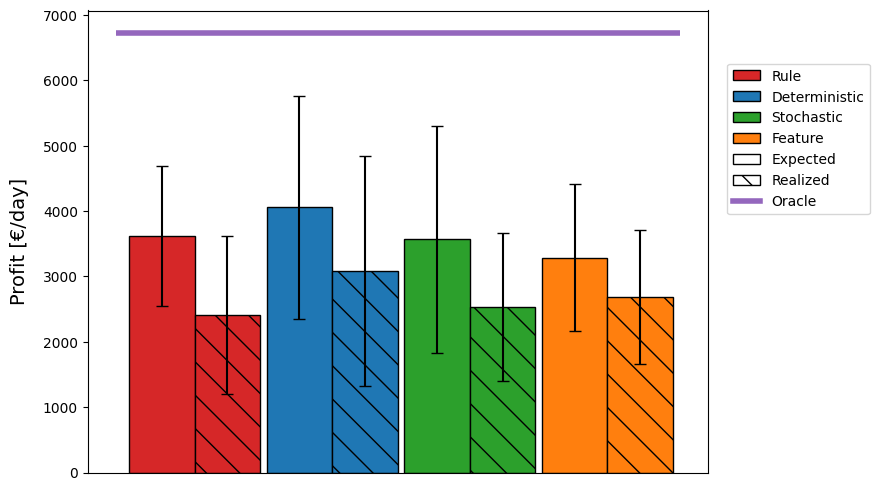

In [8]:
forecast = [1]
SampleSize = [5]

plot_profit_Test(Array,'', Forecast_examination_idx, SampleSize_examination_idx, barwidth = 0.1,  ShowEachTestDay = False,save=True)

In [9]:
fixd5 = [f'f{forecast_idx}_d{SampleSize_idx}_upd{d}_t{d+1}' for d in range(0,88)]
print(fixd5)

x_axis = [upd for upd in range(0,88)]
data_RT = df_RT_Profit[fixd5].T
data_Exp = df_Exp_Profit[fixd5].T

['f1_d5_upd0_t1', 'f1_d5_upd1_t2', 'f1_d5_upd2_t3', 'f1_d5_upd3_t4', 'f1_d5_upd4_t5', 'f1_d5_upd5_t6', 'f1_d5_upd6_t7', 'f1_d5_upd7_t8', 'f1_d5_upd8_t9', 'f1_d5_upd9_t10', 'f1_d5_upd10_t11', 'f1_d5_upd11_t12', 'f1_d5_upd12_t13', 'f1_d5_upd13_t14', 'f1_d5_upd14_t15', 'f1_d5_upd15_t16', 'f1_d5_upd16_t17', 'f1_d5_upd17_t18', 'f1_d5_upd18_t19', 'f1_d5_upd19_t20', 'f1_d5_upd20_t21', 'f1_d5_upd21_t22', 'f1_d5_upd22_t23', 'f1_d5_upd23_t24', 'f1_d5_upd24_t25', 'f1_d5_upd25_t26', 'f1_d5_upd26_t27', 'f1_d5_upd27_t28', 'f1_d5_upd28_t29', 'f1_d5_upd29_t30', 'f1_d5_upd30_t31', 'f1_d5_upd31_t32', 'f1_d5_upd32_t33', 'f1_d5_upd33_t34', 'f1_d5_upd34_t35', 'f1_d5_upd35_t36', 'f1_d5_upd36_t37', 'f1_d5_upd37_t38', 'f1_d5_upd38_t39', 'f1_d5_upd39_t40', 'f1_d5_upd40_t41', 'f1_d5_upd41_t42', 'f1_d5_upd42_t43', 'f1_d5_upd43_t44', 'f1_d5_upd44_t45', 'f1_d5_upd45_t46', 'f1_d5_upd46_t47', 'f1_d5_upd47_t48', 'f1_d5_upd48_t49', 'f1_d5_upd49_t50', 'f1_d5_upd50_t51', 'f1_d5_upd51_t52', 'f1_d5_upd52_t53', 'f1_d5_upd5

In [10]:
print(df_RT_Profit[fixd5].mean(axis=1))
print(df_Exp_Profit[fixd5].mean(axis=1))

sto        2531.334882
det        3080.796623
oracle     6733.798103
feature    2684.541248
rule       2414.336300
dtype: float64
sto        3568.952519
det        4056.053857
oracle     6733.798103
feature    3287.768360
rule       3620.369674
dtype: float64


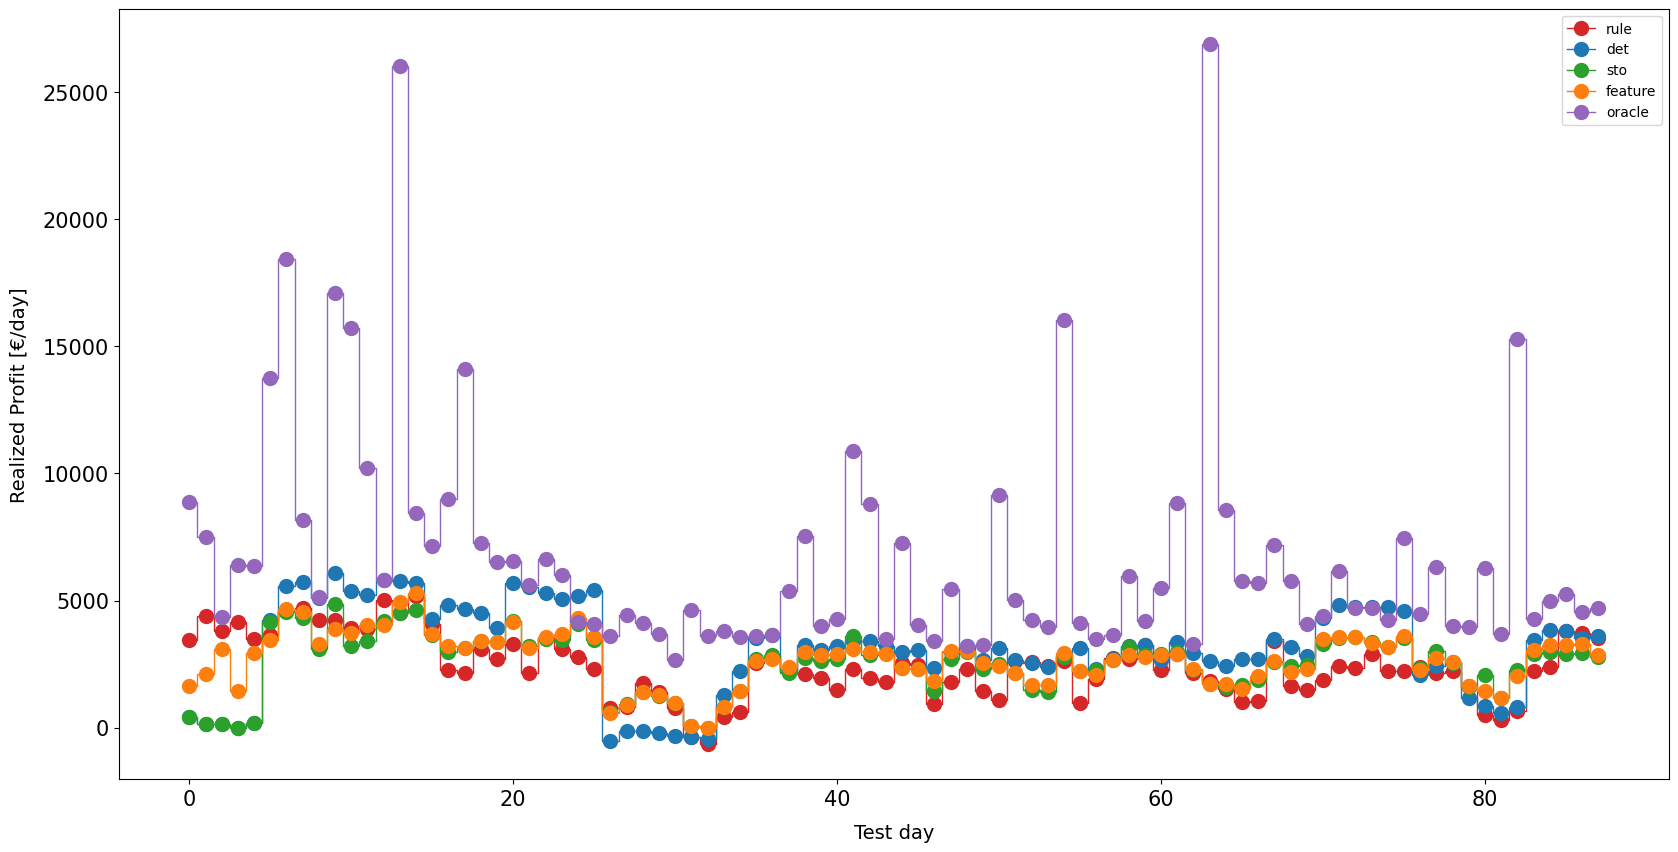

In [11]:
plot_each_test_day_Profit(data_RT,['rule','det','sto','feature','oracle'],x_axis,'steps-mid',save=True)

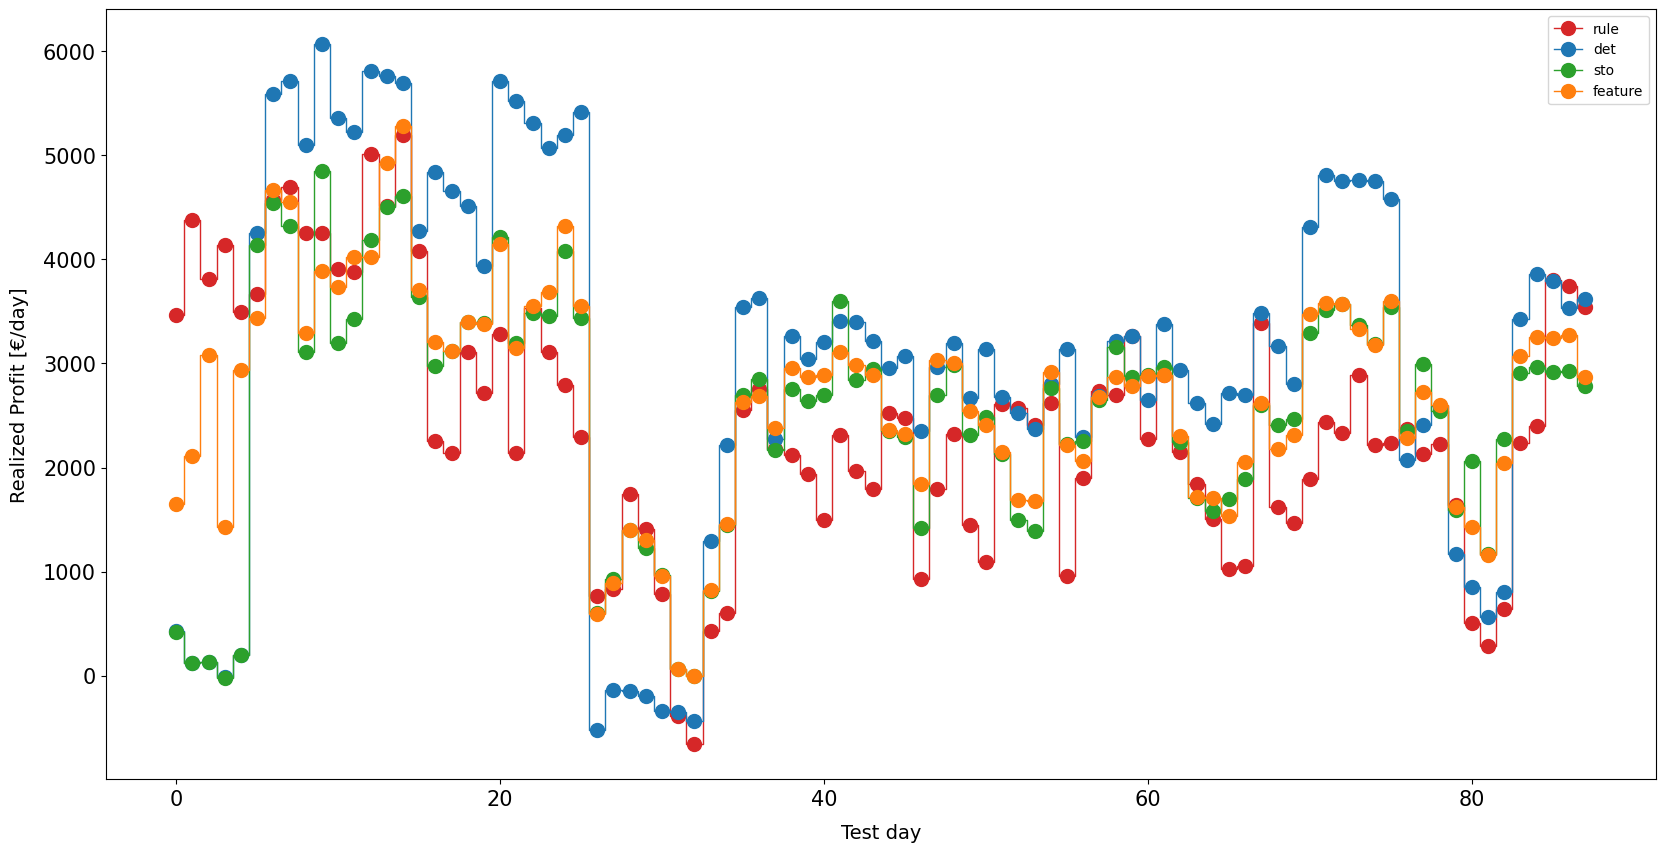

In [12]:
plot_each_test_day_Profit(data_RT,['rule','det','sto','feature'],x_axis,'steps-mid')

### Interesting model behavior cases:

- 0 - 4 (rule is the best)
- 63-65 (det is the best)
- 41,80 (sto is the best)
- 7,14,1581 (fea is best?)



In [13]:
CountArray, model_order,profit_type_order = Count_performance_for_each_model(Array)
print(model_order,profit_type_order)
print(np.shape(CountArray))
print(np.shape(np.sum(CountArray, axis=2)))

['rule', 'det', 'sto', 'feature', 'oracle'] ['Expected', 'RT']
(1, 1, 88, 4, 2)
(1, 1, 4, 2)


In [14]:
CountArray_new  = np.sum(CountArray, axis=2)

In [15]:
print(df_RT_Profit[fixd5].mean(axis=1))
print(df_Exp_Profit[fixd5].mean(axis=1))

sto        2531.334882
det        3080.796623
oracle     6733.798103
feature    2684.541248
rule       2414.336300
dtype: float64
sto        3568.952519
det        4056.053857
oracle     6733.798103
feature    3287.768360
rule       3620.369674
dtype: float64


In [16]:
meanRT = df_RT_Profit[fixd5].mean(axis=1)
meanExp = df_Exp_Profit[fixd5].mean(axis=1)

In [17]:
result_summary = [["Expected best", CountArray_new[Forecast_examination_idx[0],SampleSize_examination_idx[0],0,0],CountArray_new[Forecast_examination_idx[0],SampleSize_examination_idx[0],1,0],CountArray_new[Forecast_examination_idx[0],SampleSize_examination_idx[0],2,0],CountArray_new[Forecast_examination_idx[0],SampleSize_examination_idx[0],3,0] ],
                    ["Realized best", CountArray_new[Forecast_examination_idx[0],SampleSize_examination_idx[0],0,1],CountArray_new[Forecast_examination_idx[0],SampleSize_examination_idx[0],1,1],CountArray_new[Forecast_examination_idx[0],SampleSize_examination_idx[0],2,1],CountArray_new[Forecast_examination_idx[0],SampleSize_examination_idx[0],3,1]  ],
                    ["Expected average", meanExp['rule'],meanExp['det'],meanExp['sto'],meanExp['feature'] ],
                    ["Realized average", meanRT['rule'],meanRT['det'],meanRT['sto'],meanRT['feature'] ]]
headers = ["Rule", "Deterministic", "Stochastic", "Feature"]
table = tabulate(result_summary, headers, tablefmt="grid")
print(table)

+------------------+---------+-----------------+--------------+-----------+
|                  |    Rule |   Deterministic |   Stochastic |   Feature |
+==================+=========+=================+==============+===========+
| Expected best    |   33    |           55    |         0    |      0    |
+------------------+---------+-----------------+--------------+-----------+
| Realized best    |   16    |           58    |        10    |      4    |
+------------------+---------+-----------------+--------------+-----------+
| Expected average | 3620.37 |         4056.05 |      3568.95 |   3287.77 |
+------------------+---------+-----------------+--------------+-----------+
| Realized average | 2414.34 |         3080.8  |      2531.33 |   2684.54 |
+------------------+---------+-----------------+--------------+-----------+


In [18]:
result_summary = [  ["Expected profit average [\euro/day]", int(meanExp['rule']),int(meanExp['det']),int(meanExp['sto']),int(meanExp['feature']) ],
                    ["Realized profit average [\euro/day]", int(meanRT['rule']),int(meanRT['det']),int(meanRT['sto']),int(meanRT['feature']) ],
                    ["Highest expected profit [count]", CountArray_new[Forecast_examination_idx[0],SampleSize_examination_idx[0],0,0],CountArray_new[Forecast_examination_idx[0],SampleSize_examination_idx[0],1,0],CountArray_new[Forecast_examination_idx[0],SampleSize_examination_idx[0],2,0],CountArray_new[Forecast_examination_idx[0],SampleSize_examination_idx[0],3,0] ],
                    ["Highest realized profit [count]", CountArray_new[Forecast_examination_idx[0],SampleSize_examination_idx[0],0,1],CountArray_new[Forecast_examination_idx[0],SampleSize_examination_idx[0],1,1],CountArray_new[Forecast_examination_idx[0],SampleSize_examination_idx[0],2,1],CountArray_new[Forecast_examination_idx[0],SampleSize_examination_idx[0],3,1]  ]
                    ]
headers = ["Rule", "Deterministic", "Stochastic", "Feature"]

# Generate LaTeX table code
table_code = "\\begin{table}[H]\n"
table_code += "\\centering\n"
table_code += "\\caption{Summary of Base case Results}\n"
table_code += "\\label{tab:base_case_results}\n"
table_code += "\\begin{tabular}{|" + "|".join(["l"] + ["c"] * (len(headers))) + "|}\n"
table_code += "\\hline\n"
table_code += " & " + " & ".join(headers) + " \\\\\n"
table_code += "\\hline\n"

for row in result_summary:
    table_code += " & ".join(str(item) for item in row) + " \\\\\n"

table_code += "\\hline\n"
table_code += "\\end{tabular}\n"
table_code += "\\end{table}"

print(table_code)


\begin{table}[H]
\centering
\caption{Summary of Base case Results}
\label{tab:base_case_results}
\begin{tabular}{|l|c|c|c|c|}
\hline
 & Rule & Deterministic & Stochastic & Feature \\
\hline
Expected profit average [\euro/day] & 3620 & 4056 & 3568 & 3287 \\
Realized profit average [\euro/day] & 2414 & 3080 & 2531 & 2684 \\
Highest expected profit [count] & 33 & 55 & 0 & 0 \\
Highest realized profit [count] & 16 & 58 & 10 & 4 \\
\hline
\end{tabular}
\end{table}


# EXAMINE EXPECTED RESULTS
#### WHY IS RULE BETTER SOMETIMES AND STO AND FEATURE IS NEVER IN EXPECTED??

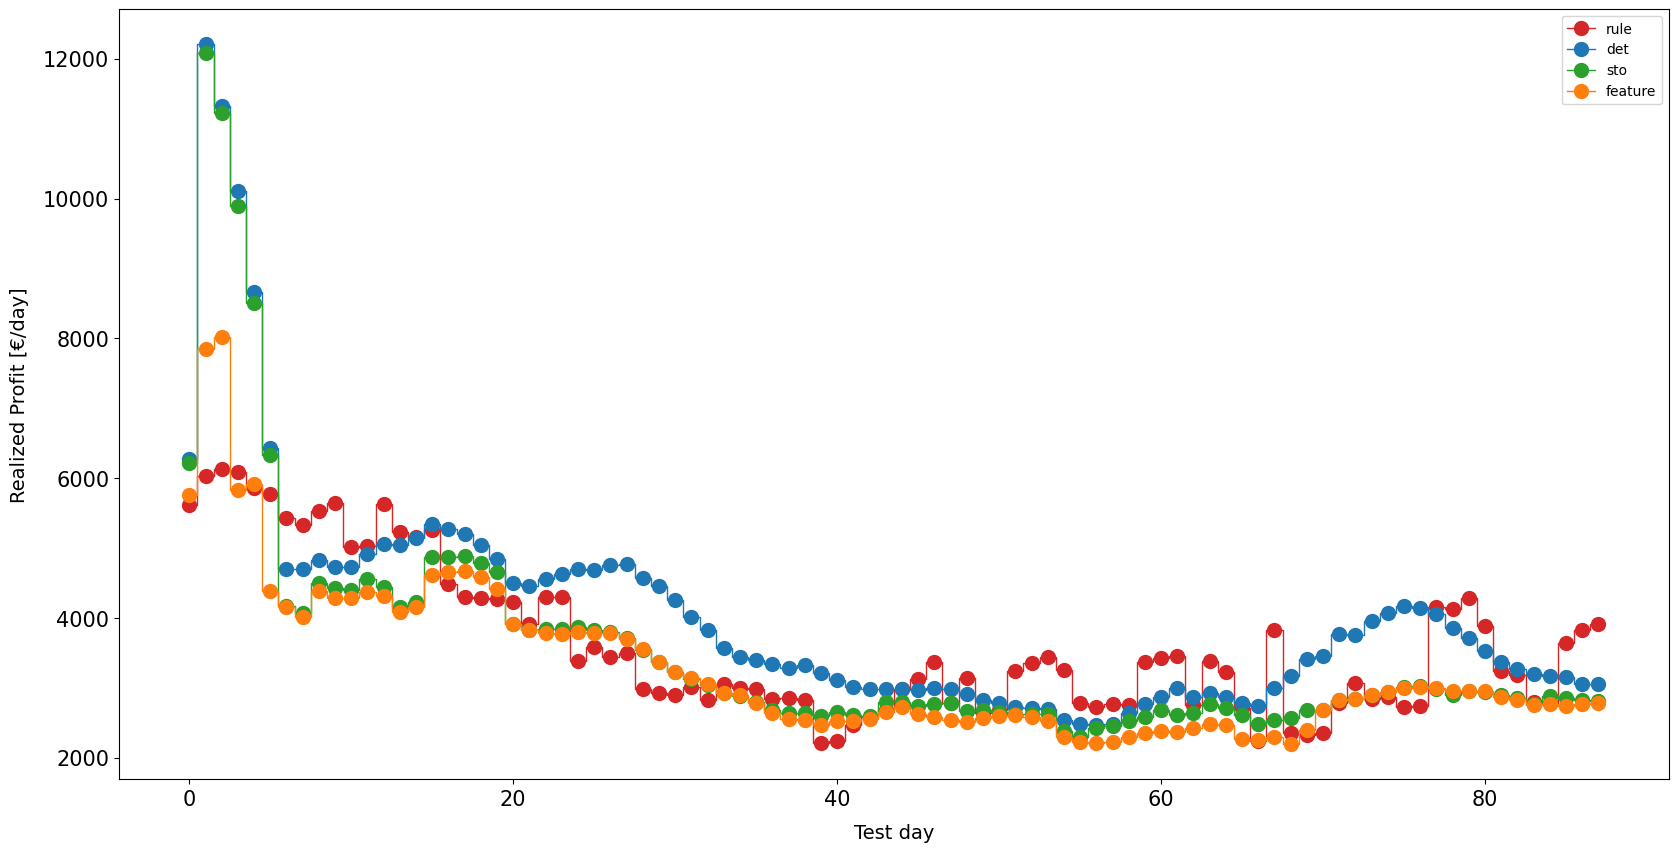

In [19]:
plot_each_test_day_Profit(data_Exp,['rule','det','sto','feature'],x_axis,'steps-mid')

Check on of the days:

In [20]:
f = 1
d = 5

fixd5 = [f'f{f}_d{d}_upd{upd}_t{upd+1}' for upd in range(0,4)]
print(fixd5)
x_axis = [upd for upd in range(3,5)]

['f1_d5_upd0_t1', 'f1_d5_upd1_t2', 'f1_d5_upd2_t3', 'f1_d5_upd3_t4']


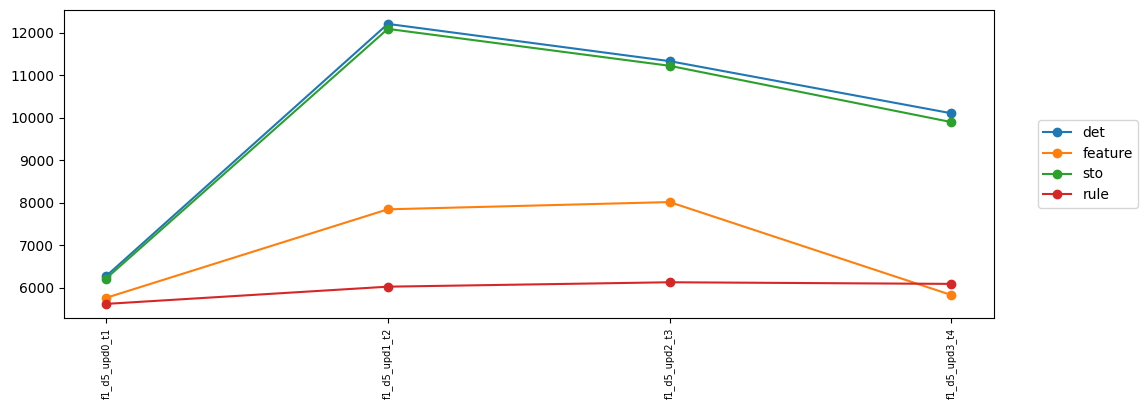

In [21]:
data = df_Exp_Profit[fixd5].T
models = ['det','feature','sto','rule']
plot = data[models]
plt.figure(figsize=(12,4))
plt.plot(plot, 'o-')
plt.xticks(rotation = 90, fontsize=7)
plt.legend(models, bbox_to_anchor=(1.04, 0.5), loc="center left")
plt.show()

### Open json results and plot
Plots: 
1) Bid quantity
2) bid price used for training 
3) bid price
4) accepted bid price
5) coefficients(learning)
6) Expected and RT Profit
7) Battery dynamics

### Test case: d5 upd62 t63  
(Where deterministic model has a peak performance)

In [22]:
current_directory

'C:\\Users\\Daniel  BV\\Desktop\\Thesis'

In [23]:
# Select plot parameters
choose_id = fixd5[2]
print(choose_id)
save = True #True or False
model = 'Sto' # Oracle, Rule, Det, Sto, Feature,
Profit_plot = 'all' # Rule, Det, Sto, Learn, all (for exp_and_RT Profit)
with_acceptance = True #True or False (for plot_training_price)

plt.ioff() #Repress showing plots
results = save_plots(current_directory,Add_on_path, choose_id, save, model, with_acceptance, Profit_plot);

f1_d5_upd2_t3


Test case:  f1_d5_upd2_t3
+----------+----------+---------+-----------------+--------------+-----------+
|          |   Oracle |    Rule |   Deterministic |   Stochastic |   Feature |
+==========+==========+=========+=================+==============+===========+
| RT       |  4357.18 | 3806.92 |         130.524 |      129.321 |   3084.59 |
+----------+----------+---------+-----------------+--------------+-----------+
| Expected |  4357.18 | 6131.31 |       11331.3   |    11221.9   |   8017.11 |
+----------+----------+---------+-----------------+--------------+-----------+


Check whether there exist any negative values from the feature model

In [24]:
ids = [f'f{f}_d{d}_upd{upd}_t{upd+1}' for upd in range(0, 88)]
for id in ids:
    results = import_test_case(current_directory, Add_on_path, id)
    for bid in ["b_FD1_up","b_FD2_up","b_FD1_dn","b_FD2_dn","b_DA_dn","b_DA_up"]:
        bid_values = results["Feature"]['Bid']["b_FD1_up"]
        
        #print(bid_values)
        has_negative = any(value < 0 for value in bid_values)
        if has_negative:
            print("Negative values found in the list!")





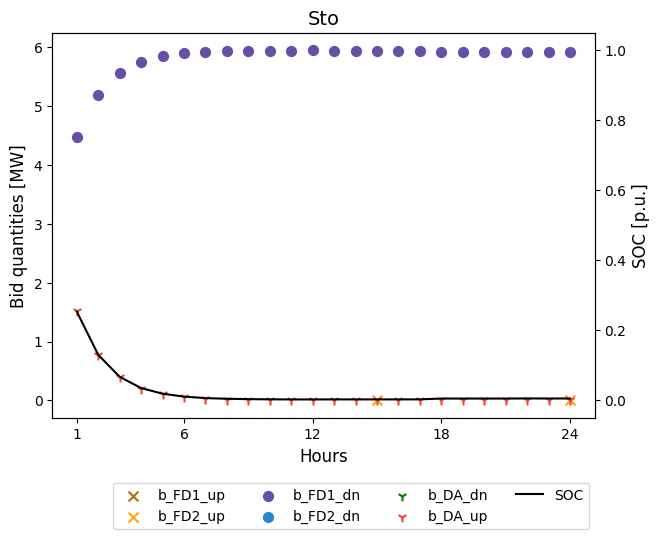

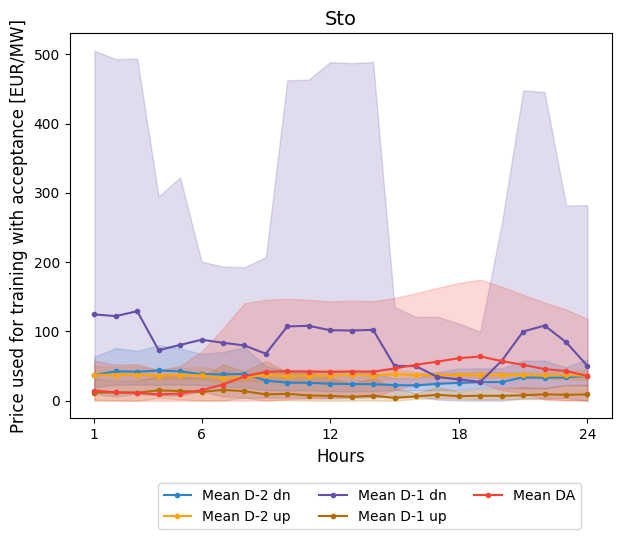

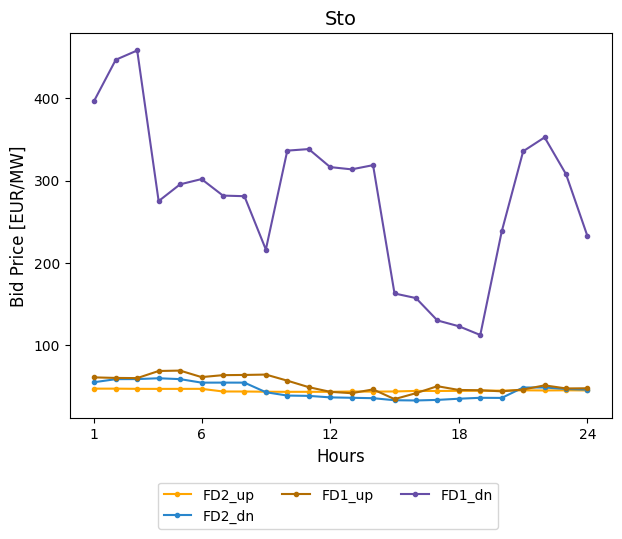

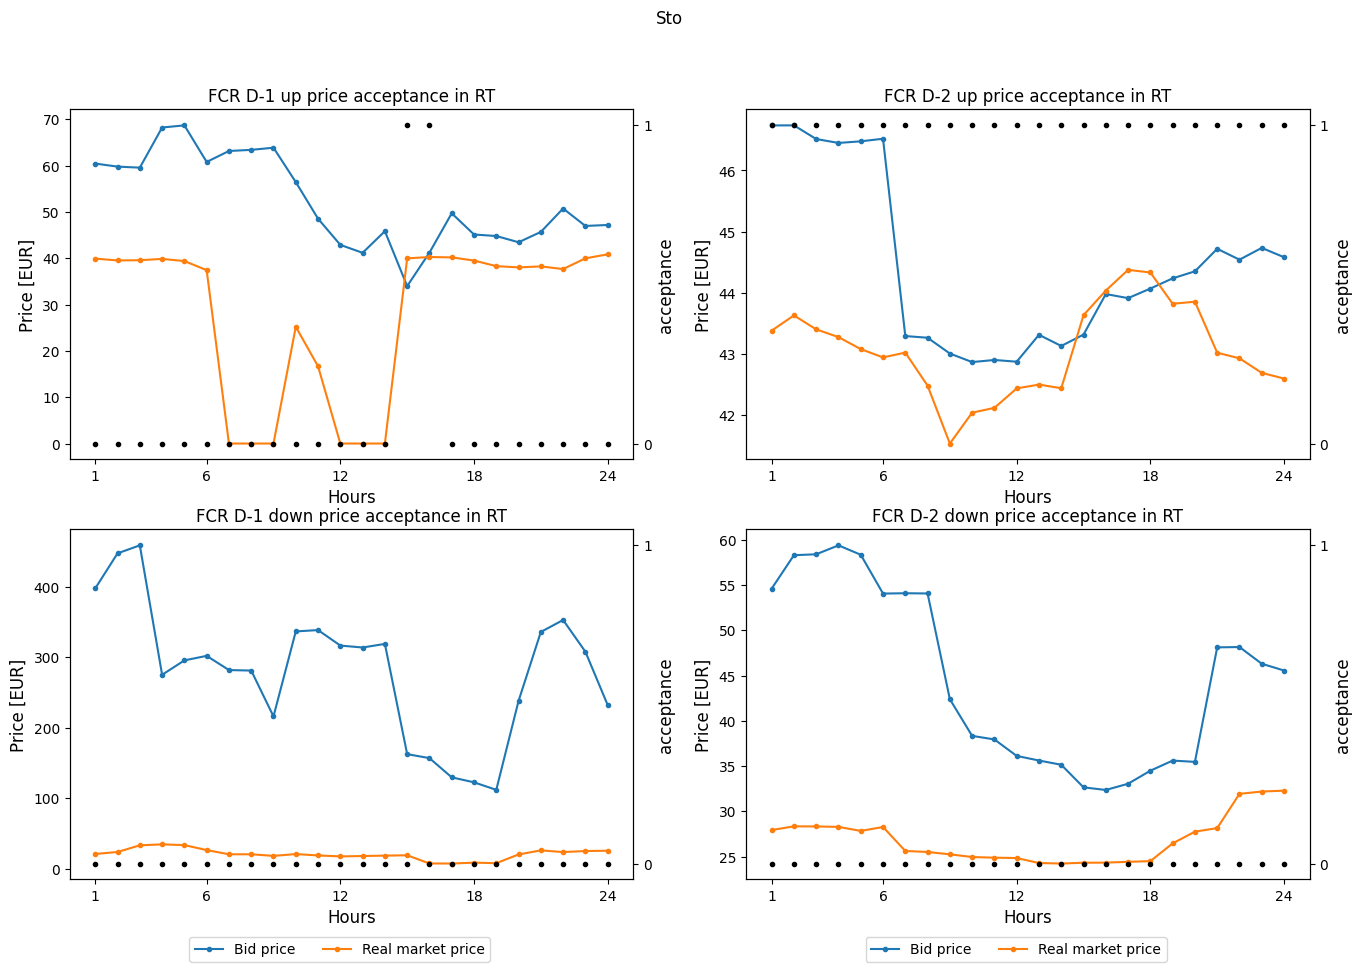

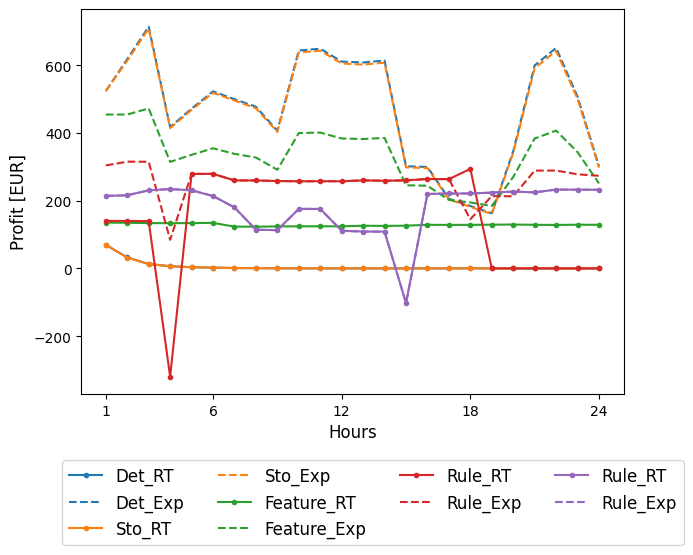

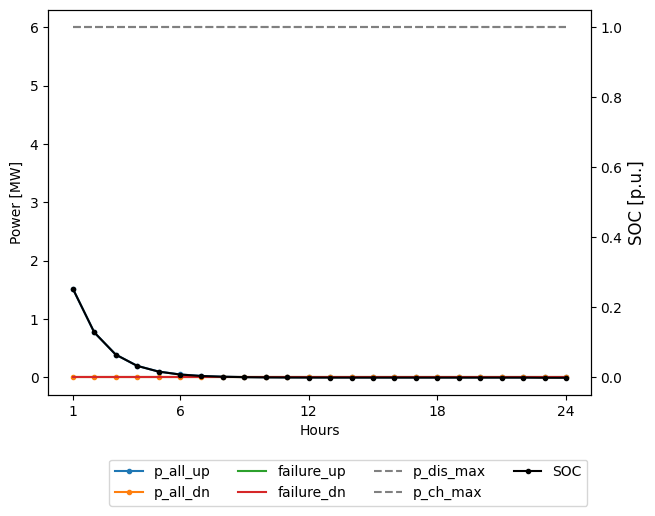

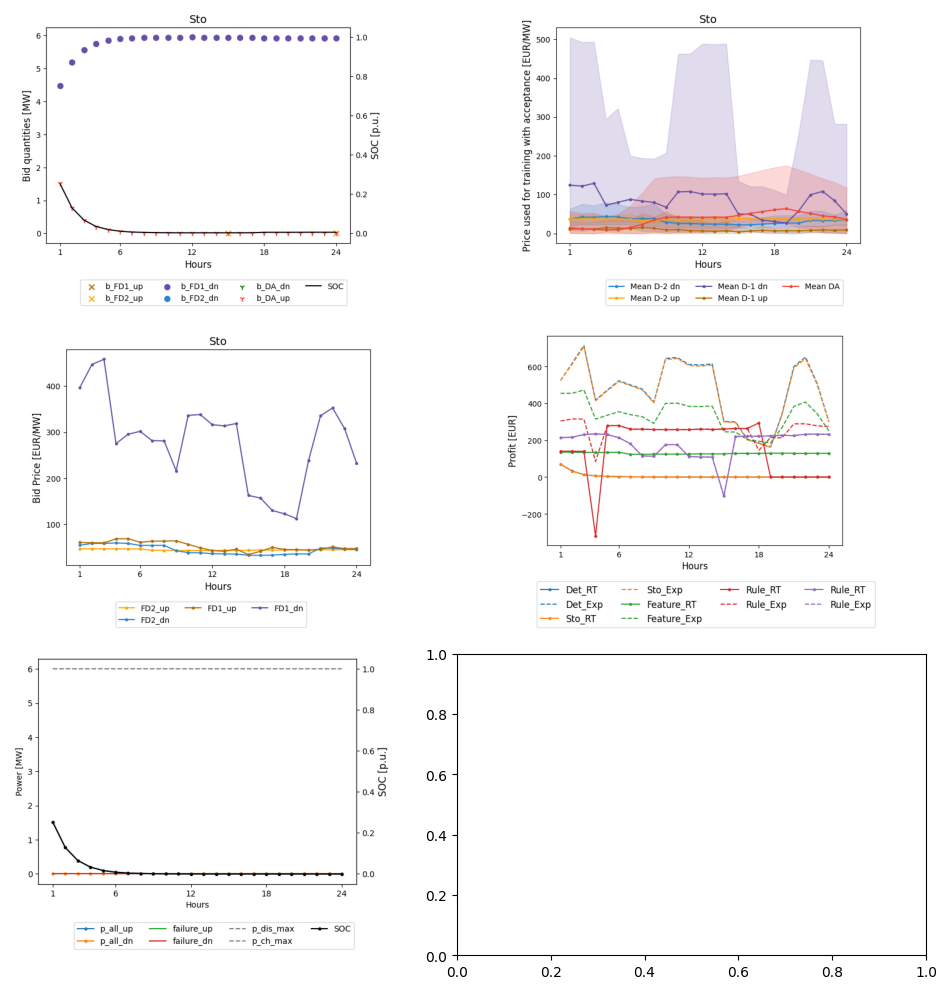

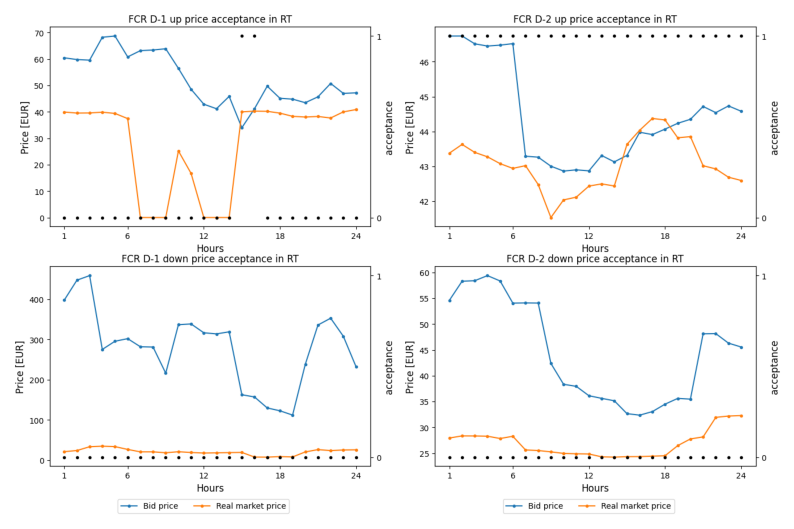

In [25]:
#View plots
view_plots(model, Profit_plot)


In [26]:
def bid_train_plots(bid_result, model, color, save):
    #Bid quantity plots with SOC
    # Find dimension to estimate how many plots there should be showed
    #np.shape(bid_result['b_FD1_up_train']) # (d,h)
    num_days = np.size(bid_result['b_FD1_up_train'][:,0]) 
    
    fig, ax = plt.subplots(num_days,figsize=(7,5))
    for i in range(0,num_days):
        x = np.arange(1,25)
        Total = np.zeros(24)

        mask = np.nonzero(bid_result['b_FD1_up_train'][i,:])[0]
        ax[i].scatter(x[mask], bid_result['b_FD1_up_train'][i,mask], label='b_FD1_up', marker='x',s=50, color=color['FD1_up'])
        mask = np.nonzero(bid_result['b_FD2_up_train'][i,:])[0]
        ax[i].scatter(x[mask], bid_result['b_FD2_up_train'][i,mask], label='b_FD2_up', marker='x',s=50, color=color['FD2_up'])
        mask = np.nonzero(bid_result['b_FD1_dn_train'][i,:])[0]
        ax[i].scatter(x[mask], bid_result['b_FD1_dn_train'][i,mask], label='b_FD1_dn', marker='o',s=50, color=color['FD1_dn'])
        mask = np.nonzero(bid_result['b_FD2_dn_train'][i,:])[0]
        ax[i].scatter(x[mask], bid_result['b_FD2_dn_train'][i,mask], label='b_FD2_dn', marker='o',s=50, color=color['FD2_dn'])
        mask = np.nonzero(bid_result['b_DA_dn_train'][i,:])[0]
        ax[i].scatter(x[mask], bid_result['b_DA_dn_train'][i,mask], label='b_DA_dn', marker='1',s=50, color=color['DA_dn'])
        mask = np.nonzero(bid_result['b_DA_up_train'][i,:])[0]
        ax[i].scatter(x[mask], bid_result['b_DA_up_train'][i,mask], label='b_DA_up', marker='1',s=50, color=color['DA_up'])
        for h in range(0,24):
            Total[h] = bid_result['b_FD1_up_train'][i,h] +  bid_result['b_FD2_up_train'][i,h] + bid_result['b_FD1_dn_train'][i,h] +  bid_result['b_FD2_dn_train'][i,h] + bid_result['b_DA_dn_train'][i,h] + bid_result['b_DA_up_train'][i,h]
        
        ax[i].scatter(x, Total, label='Total', marker='1',s=50, color=color['Total'])
        #ax[i].set_ylabel('Trained Bid quantities [MW]', fontsize=12)
        #ax[i].set_xlabel('Hours', fontsize=12)
    
        # ax1.legend(loc='upper left', bbox_to_anchor=(0, -0.2), ncol=3)
        

        ax2 = ax[i].twinx()
        if 'Rule' not in model:
            ax2.plot(x, bid_result['SOC']/6, color=color['SOC'], label='SOC')
        elif 'Rule' in model: #Rule based model gives normalized SOC
            ax2.plot(x, bid_result['SOC'], color=color['SOC'], label='SOC')
        #ax2.set_ylabel('SOC [p.u.]', fontsize=12)
        #ax2.set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1])
        ax2.set_ylim(-0.05,1.05)
    # ax2_1.legend(loc='upper right', bbox_to_anchor=(1, -0.1), ncol=3)

    ax[0].set_title(model, fontsize=14) # Remove this when exporting plots for overleaf
    ax[-1].set_xticks([1, 6, 12, 18, 24])
    # Combine the legends
    handles1, labels1 = ax[i].get_legend_handles_labels()
    handles2, labels2 = ax2.get_legend_handles_labels()
    handles = handles1 + handles2
    labels = labels1 + labels2
    plt.legend(handles, labels, loc='upper left', bbox_to_anchor=(0.1, -0.15), ncol=4)

    if save == True:
        plt.savefig(f'Result_plots/bid_trained_plots_{model}.png', bbox_inches='tight')

    plt.show()

In [27]:
bid_train_plots(results[model]['Bid'], model, color, save)


NameError: name 'color' is not defined

In [ ]:
# Check forecast alignment
# Select plot parameters
choose_id = fixd5[2]
print(choose_id)
save = True #True or False
model = 'Sto' # Oracle, Rule, Det, Sto, Feature,
Profit_plot = 'Sto' # Rule, Det, Sto, Learn, all (for exp_and_RT Profit)
with_acceptance = True #True or False (for plot_training_price)

plt.ioff() #Repress showing plots
#results = save_plots(current_directory,Add_on_path, choose_id, save, model, with_acceptance, Profit_plot);
#Fix color schemes
color = {'FD2_up': '#FFA500', # orange
        'FD2_dn': '#2986cc', # blue
        'DA_up': '#f44336', # red 
        'DA_dn': 'green', # green
        'FD1_up': '#b26d02', # brown orange
        'FD1_dn': '#674ea7', # darkgreen
        'Total' : 'purple',
        'SOC': 'black'}

bid_result = import_test_case(current_directory, Add_on_path, choose_id)

# Check forecast alignment


In [ ]:
desktop = os.path.join(os.path.join(os.environ['USERPROFILE']), 'Desktop') 
This_file_path = os.getcwd()
path_processed_data = This_file_path + "\\lightenup\\Processed_data\\"
print(path_processed_data)
data = pd.read_csv(path_processed_data + 'real.csv') # Change path
data_forecast = pd.read_csv(path_processed_data +  'forecast_all1.csv')



In [ ]:
start_date = "2022-01-01 00:00:00"
end_date = "2023-03-31 23:00:00"
date_range = pd.date_range(start=start_date, end=end_date, freq='H')

date_range = pd.DataFrame(index=date_range).reset_index()


In [ ]:
start_of_2023 = 8760
updated_day = 2
test_day_add_on = 1

start_idx = start_of_2023 + (updated_day + test_day_add_on)*24 
end_idx = start_idx + 24 -1
date_range["index"].loc[start_idx:end_idx]

In [ ]:
data_forecast["FD1_up"].loc[start_idx:end_idx]

How about the stochastic model. What data does it take in?

In [ ]:
end_sample_sto = start_idx -1 -24
D_2_list = [2,3,4,5,6]
value = 0
for hd in D_2_list:
    print(data["FD1_up"].loc[start_idx-hd*24])
    value = value + data["FD1_up"].loc[start_idx-hd*24]
print(value/5)
# 1.53365  95.86821  46.5331  111.91639  46.42427

In [ ]:



start_sample_sto = end_sample_sto - 5*24+1
print(start_sample_sto,end_sample_sto)
end_sample_sto-start_sample_sto

data_slice = data["FD1_up"].loc[start_sample_sto:end_sample_sto]

date_range["index"].loc[start_sample_sto:end_sample_sto]

In [ ]:
reshaped_data = np.reshape(data_slice, (24, 5),order='F')
print(reshaped_data)
print(np.mean(reshaped_data,axis=1))

In [ ]:
bid_result[model]["Bid"].keys()
print(bid_result[model]["Bid"]["f_lambda_FD1_up_mean"])
print(bid_result[model]["Bid"]["f_lambda_FD1_up"])

# Check the bid for Feature

In [ ]:
Feature_Selection = ["Spot", "FD1_down","FD2_down","FD1_up","FD2_up"]
print(np.shape(bid_result["Feature"]['Bid']['X_f'][:,:,:]))
print(np.shape(bid_result["Feature"]['Bid']['X'][:,:,:]))
for f,feature in enumerate(Feature_Selection):
    print(feature)
    print(bid_result["Feature"]['Bid']['X'][f,5,:]-bid_result["Feature"]['Bid']['X_f'][f,:,:])
#bid_result["Feature"]['Bid']['X_f']


In [ ]:
print(np.shape(bid_result["Feature"]['Bid']['q_DA_dn'][:,:]))